In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger
Example for the package
"""

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
# General
config["general"]["random state seed"] = 1337
# Scenario
config['scenario']['population size'] = 10
config['scenario']['duration'] = 1000
config['scenario']['organism movement'] = False
config['scenario']['exclusion'] = True
config['scenario']['injection']['rate'] = 1e-1
config['scenario']['injection']['y range'] = [5., 15.]
config['scenario']['light prop'] = {
            "switch": True,
            "x_pos": 5.,
            "y_pos": 10.,
        }
config['scenario']['detector'] = {
    "switch": True,
    "type": "PMTSpec",
    "response": True,
    "acceptance": "Flat",
    "mean detection prob": 0.5
}
# Organisms 
config['organisms']['emission fraction'] = 0.1
config['organisms']['alpha'] = 10.
config['organisms']['photon yield'] = 1e8
# Geometry
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 40.,
    'y_length': 20.,
    'offset': None,
}
config['geometry']['observation'] = {
    'function': 'rectangle',
    'x_length': 40.,
    'y_length': 12.,
    "offset": np.array([0., 4.]),
}
config['geometry']["exclusion"] = {
    "function": "sphere",
    "radius": 0.3,
    "x_pos": 5.,
    "y_pos": 10.,
}
# Water
config['water']['model']['name'] = 'custom' # 'potential cylinder'
config['water']['model']['directory'] = "../data/current/cyclic/"
config['water']['model']['time step'] = 50
config['advanced']['starting step'] = 575

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
# from scipy.stats import gamma
# test_array=np.full((24,),10)
# gamma.pdf(test_array,a=3)

In [10]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,pulse mean,pulse sd,is_emitting,emission_duration,encounter photons,shear photons,photons
0,test short pulse,40.014599,7.374274,0.0,0.000000,0.000876,0.6628,False,11.529705,0.1,0.0001,20.0,10.0,True,117.0,0.0,0.0,0.0
1,test short pulse,40.030891,13.174390,0.0,0.000000,0.001251,0.7636,False,1.080666,0.1,0.0001,20.0,10.0,True,52.0,0.0,0.0,0.0
2,test short pulse,11.163782,2.499426,0.0,5.721332,0.001367,1.0000,False,22.530487,0.1,0.0001,20.0,10.0,False,0.0,0.0,0.0,0.0
3,test short pulse,18.385418,19.671402,0.0,2.038001,0.000725,1.0000,False,5.729261,0.1,0.0001,20.0,10.0,False,0.0,0.0,0.0,0.0
4,test short pulse,40.024481,8.235891,0.0,0.000000,0.000692,0.6577,False,21.046474,0.1,0.0001,20.0,10.0,False,-75.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,test short pulse,0.000000,9.811417,0.0,0.000000,0.001385,1.0000,True,17.157975,0.1,0.0001,20.0,10.0,False,0.0,0.0,0.0,0.0
2506,test short pulse,0.000000,6.898603,0.0,0.000000,0.001027,1.0000,True,9.042349,0.1,0.0001,20.0,10.0,False,0.0,0.0,0.0,0.0
2507,test short pulse,0.000000,12.249769,0.0,0.000000,0.000987,1.0000,True,13.167887,0.1,0.0001,20.0,10.0,False,0.0,0.0,0.0,0.0
2508,test short pulse,0.000000,8.410983,0.0,0.000000,0.001310,1.0000,True,10.990507,0.1,0.0001,20.0,10.0,False,0.0,0.0,0.0,0.0


In [11]:
# Random noise
noise = np.abs(np.random.normal(2e2, 1e2, len(fd.t)))

In [12]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=1.5
h_length=1.5

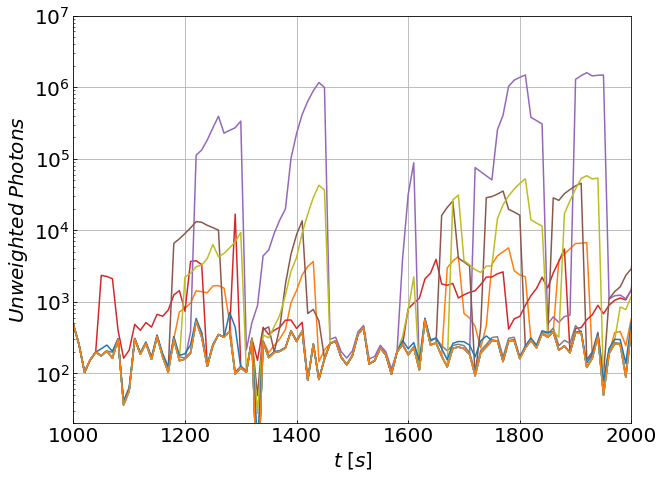

In [17]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for detector in fd.measured.keys():
    ax1.plot(fd.t / 5.,
             fd.measured[detector].values + noise,
             lw=lw, label=detector)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
# h, l = ax1.get_legend_handles_labels()
# lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.9, +2.),
#                   ncol=1, fontsize=fontsize, handlelength=h_length,
#                   fancybox=True, frameon=True)
ax1.set_ylim(2e1,1e7)
ax1.set_xlim(1e3, 2e3)
plt.show()

In [14]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')